# Predicting Medical Expenses using Linear Regression


In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [3]:
medical_df = pd.read_csv('data.csv')

In [4]:
medical_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


####Observation

- The dataset contains 1338 rows and 7 columns.



In [5]:
#Exploring the data for higher level information
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- There are 4 numerical columns ["age", "children", "bmi" and "charges" ] and 3 categorical columns ["sex", "smoker" and "region"]

- None of the columns has missing values



In [6]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
medical_df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [8]:
medical_df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
medical_df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### Observations

- Average age of the primary beneficiary is 39.2 and maximum age is 64.
- Average BMI is 30.66, that is out of normal BMI range, Maximum BMI is 53.13
- Average medical costs billed to health insurance is 13270, median is 9382 and maximum is 63770
Median is less than mean in charges , indicating distrubution is postively skewed .
- Customer on an average has 1 child.
- For Age, BMI, children , mean is almost equal to median , suggesting data is normally distrubuted

## **Exploratory Analysis and Visualization**



## **Univariate Analysis**

In [11]:
!pip install plotly matplotlib seaborn --quiet

In [12]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Column : Age(numerical)

In [14]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

## Observation

- Age of primary beneficary lies approximately between 18 - 64 . Average Age is aprrox 39. Majority of customer are in range 18- 20's.


In [15]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

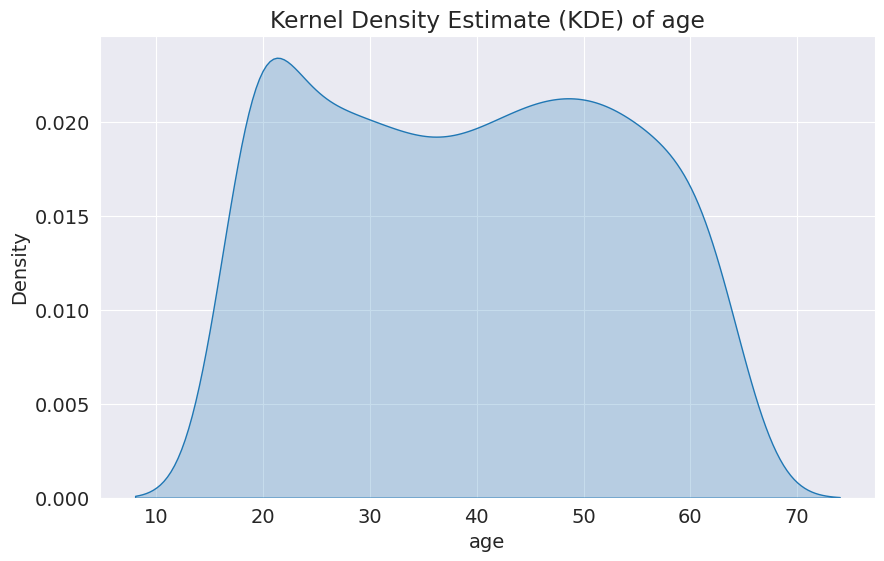

In [16]:
# To check the distribution
import seaborn as sns
import matplotlib.pyplot as plt


sns.kdeplot(medical_df['age'], fill=True)
plt.title('Kernel Density Estimate (KDE) of age')
plt.show()

## Observation

- The distribution of ages in the dataset is binormal, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages.


#### Insight: why there are over twice as many customers with ages 18 and 19, compared to other ages?

- Insuarance agency charges more money for same premium as you get older and here is the same case.people who are younger are less prone to getting sick and thus company has to pay them less for their medical bills.otherwise every age group in US has eqvivalent population density.

## Column : Sex(Categorical)

In [17]:
medical_df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [18]:
medical_df.sex.value_counts(normalize=True).mul(100).round(0).astype('str')+'%'

male      51.0%
female    49.0%
Name: sex, dtype: object

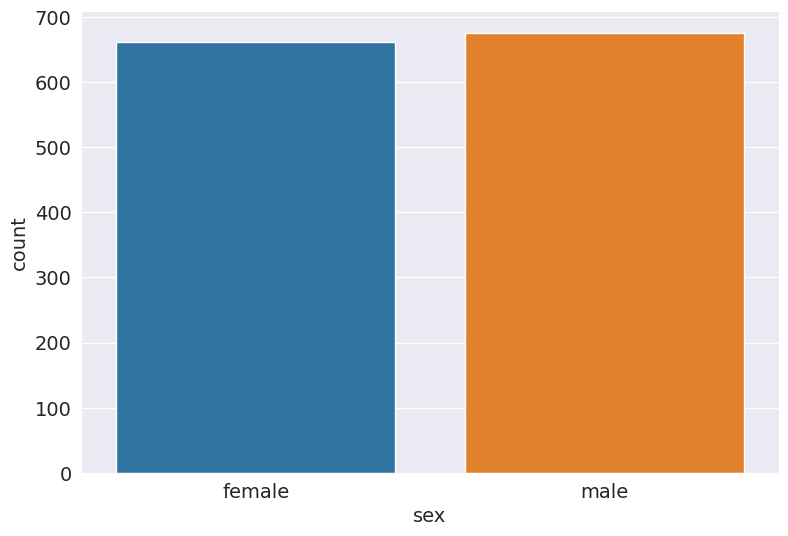

In [19]:
plt.figure(figsize=(9,6))
sns.countplot(data=medical_df, x = 'sex')
plt.show()

### Observation:

- The percentage of women is 49% and men is 51%


In [20]:
import plotly.express as px
import plotly.graph_objects as go


# Create a donut chart using Plotly Express
fig = px.pie(medical_df, names='sex', hole=0.4, title='Distribution of Gender', labels={'sex'})

# Customize the layout to make it a donut chart
fig.update_traces(textinfo='percent+label')
fig.update_layout(showlegend=False)

# Show the plot
fig.show()

## Column : BMI(numerical)

In [21]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

### Observation:

- Bmi is normally distrubuted and Average BMI of beneficiary is 30.This BMI is outside the normal range of BMI. There are lot of outliers at upper end

- The measurements of body mass index seem to form a Gaussian distribution centered around the value 30, with some outliers towards the right.

> **Insight**:why the distribution of ages forms a uniform distribution while the distribution of BMIs forms a gaussian distribution?
>
>As there are same number of people in age groups the distribution we get is uniform distribution.But, for BMIs distribution we get gaussian distribution as people who are between 20-30 are considered to be healthy relatively and less than or more than this range is considered to be health risk categories and these people are more prone to health issues and thus company will have to pay more medical bills of this kind of customers and thus they provide these type of people same health insuarance at higher prices and which in-turn attracts lesser people with out of healthy range BMI because they have to pay more

## Column : Children(categorical)

In [22]:
medical_df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [23]:
medical_df.children.value_counts(normalize=True).mul(100).round(0).astype('str')+'%'


0    43.0%
1    24.0%
2    18.0%
3    12.0%
4     2.0%
5     1.0%
Name: children, dtype: object

## Observation:

- Most of the beneficary have no childrens.
- small percentage of beneficiary has 1 to 3 number of children
- the percentage of beneficiary having more than 3 children is close to 3%


In [24]:
import plotly.express as px
import plotly.graph_objects as go


# Create a donut chart using Plotly Express
fig = px.pie(medical_df, names='children', hole=0.6, title='Distribution of Children', labels={'Children'})

# Customize the layout to make it a donut chart
fig.update_traces(textinfo='percent+label')
fig.update_layout(showlegend=False)

# Show the plot
fig.show()

## Column : Smoker(categorical)

In [25]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [26]:
medical_df.smoker.value_counts(normalize=True).mul(100).round(0).astype('str')+'%'

no     80.0%
yes    20.0%
Name: smoker, dtype: object

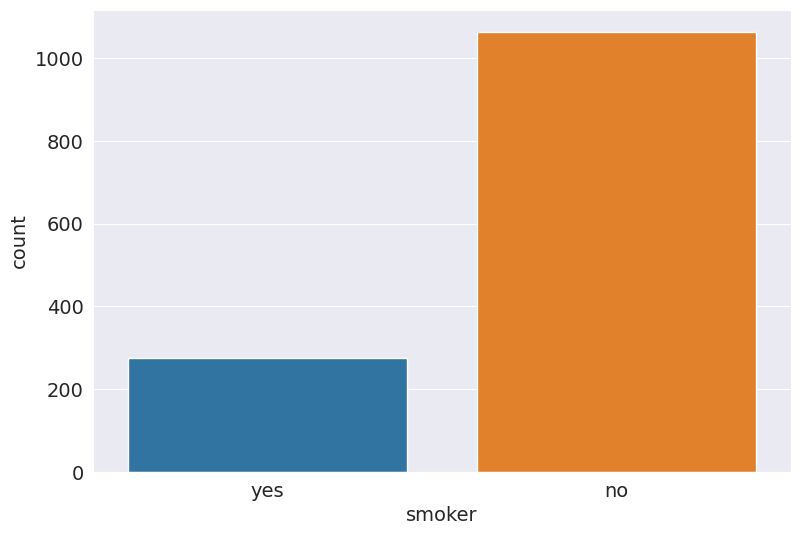

In [27]:
plt.figure(figsize=(9,6))
sns.countplot(data=medical_df, x = 'smoker')
plt.show()

### Observation

- The percentage of smoker is 20% while the percentage of non smoker is 80%


In [28]:
import plotly.express as px
import plotly.graph_objects as go


# Create a donut chart using Plotly Express
fig = px.pie(medical_df, names='smoker', hole=0.2, title='Distribution of ', labels={'Smoker'})

# Customize the layout to make it a donut chart
fig.update_traces(textinfo='percent+label')
fig.update_layout(showlegend=False)

# Show the plot
fig.show()

## Column : Region(Categorical)

In [29]:
medical_df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [30]:
medical_df.region.value_counts(normalize=True).mul(100).round(0).astype('str')+'%'

southeast    27.0%
southwest    24.0%
northwest    24.0%
northeast    24.0%
Name: region, dtype: object

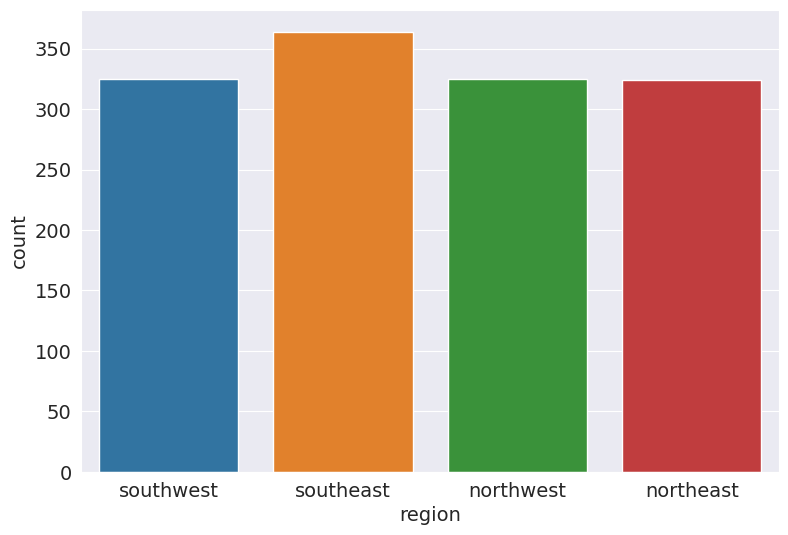

In [31]:
plt.figure(figsize=(9,6))
sns.countplot(data=medical_df, x = 'region')
plt.show()

In [32]:
import plotly.express as px
import plotly.graph_objects as go


# Create a donut chart using Plotly Express
fig = px.pie(medical_df, names='region', hole=0.4, title='Distribution of Region', labels={'Region'})

# Customize the layout to make it a donut chart
fig.update_traces(textinfo='percent+label')
fig.update_layout(showlegend=False)

# Show the plot
fig.show()

## Observation:

- There are 4 regions detected in the dataset (southeast, southwest, northeast and northwest)
- All the regions are equally distributed


## Column : Charges(numerical)

In [33]:
medical_df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [34]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['red', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

- For most customers, the annual medical charges are under $10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases.

- There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is $7300, the median for smokers is close to \$35,000.

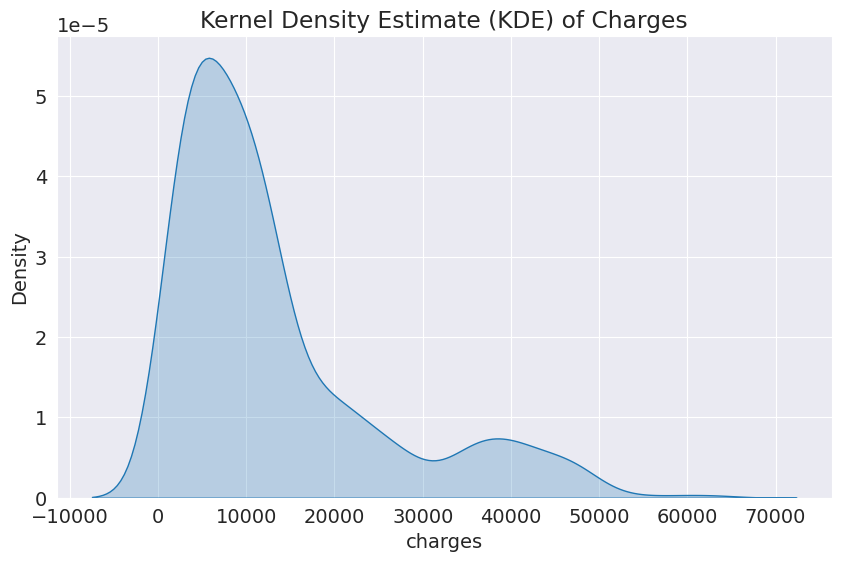

In [35]:
sns.kdeplot(medical_df['charges'], fill=True)
plt.title('Kernel Density Estimate (KDE) of Charges')
plt.show()

### Observation:

- Charges distrubution is unimodal and is left skewed .Average cost incured to the insurance is approx 130000 and highest charge is 63770.There are lot of extereme values at upper end.




## 2. Bivariate Analysis

## 2.1 Distribution of Age over other features


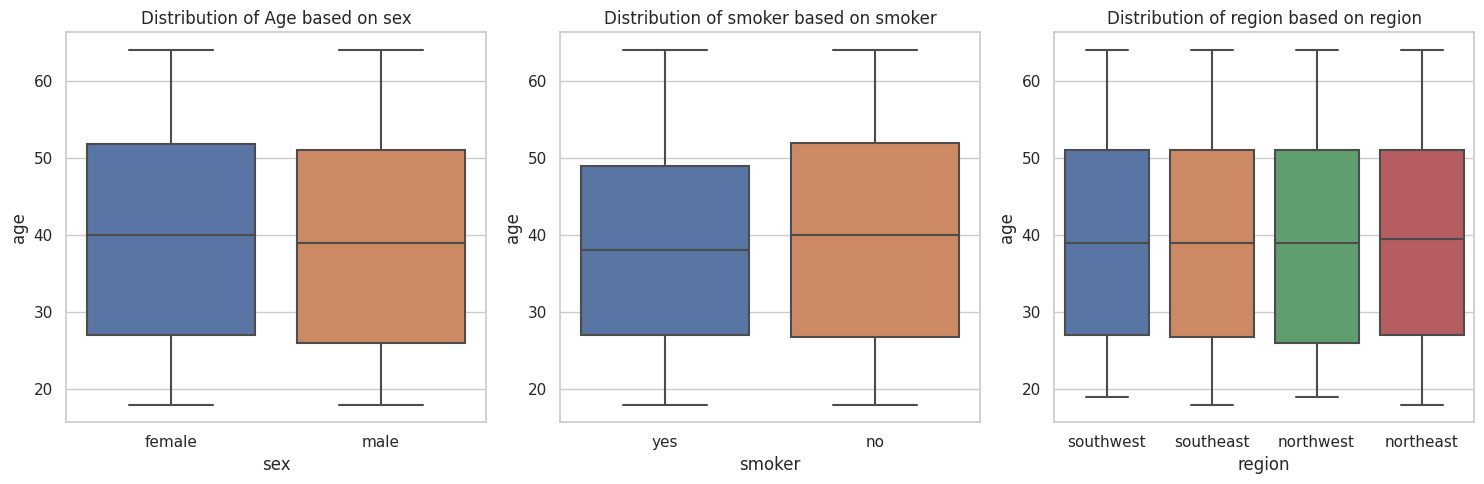

In [36]:
import seaborn as sns
# Set the style for seaborn
sns.set(style="whitegrid")

# Plot the distribution of various properties based on gender
plt.figure(figsize=(15, 5))

# Distribution of age based on Sex
plt.subplot(1, 3, 1)
sns.boxplot(x='sex', y='age', data=medical_df)
plt.title('Distribution of Age based on sex')

# Distribution of age based on smoker
plt.subplot(1, 3, 2)
sns.boxplot(x='smoker', y='age', data=medical_df)
plt.title('Distribution of smoker based on smoker')

# Distribution of age based on region
plt.subplot(1, 3, 3)
sns.boxplot(x='region', y='age', data=medical_df)
plt.title('Distribution of region based on region')


plt.tight_layout()
plt.show()

Observation :

Age Vs Gender :

- The boxplot shows that the median age for both males and females is relatively close.
- The interquartile range (IQR) for females appears slightly smaller than that for males.

Age Vs Smoker:

- The median age of somker and non smoker is same

Age Vs Region:

The median age of policyholders is almost same in all the region


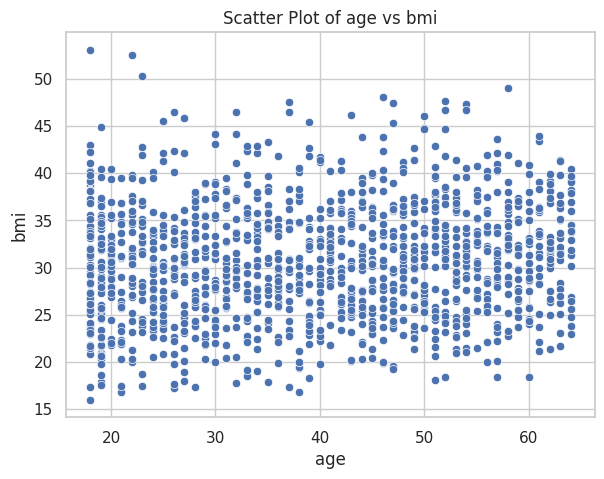

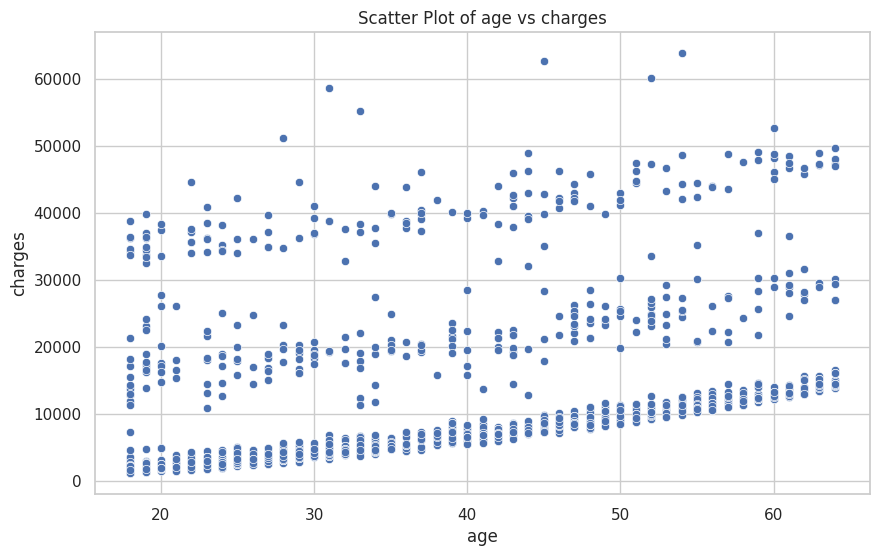

In [37]:
import seaborn as sns
# Set the style for seaborn
sns.set(style="whitegrid")

# Plot the distribution of various properties based on gender
plt.figure(figsize=(15, 5))

# Distribution of bmi based on age
plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='bmi', data=medical_df)
plt.title('Scatter Plot of age vs bmi')
plt.show()


# Distribution of charges based on age
sns.scatterplot(x='age', y='charges', data=medical_df)
plt.title('Scatter Plot of age vs charges')
plt.show()

### Observation:

- As we can notice from above two scatter plots there is no relation between age and bmi while we can observe that as the age of beneficiary increases the charges of premium increases

## Bivaraiate Analysis:

### 2.2 Column:  Sex/Gender

## Q1. How is the distribution of various properties based on gender

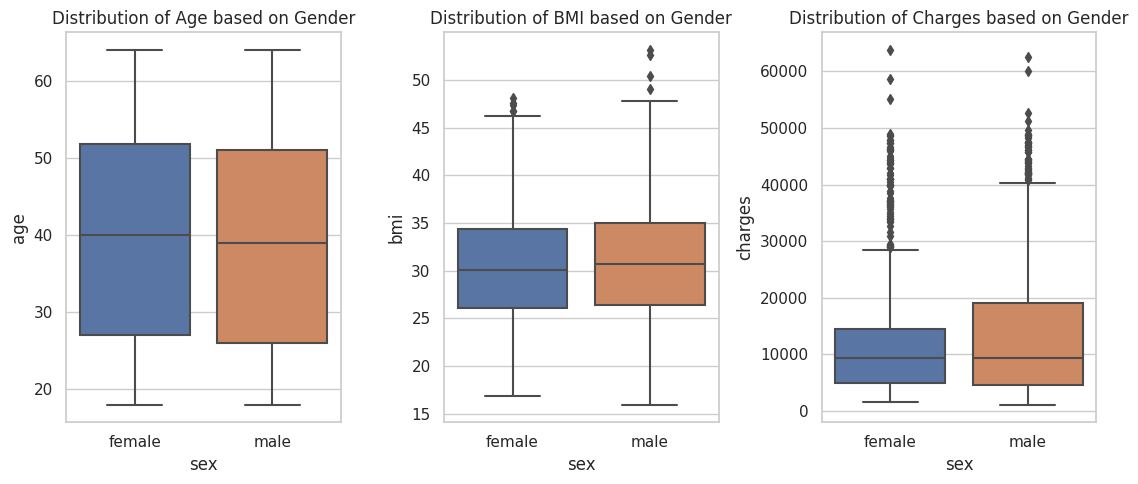

In [38]:
import seaborn as sns
# Set the style for seaborn
sns.set(style="whitegrid")

# Plot the distribution of various properties based on gender
plt.figure(figsize=(15, 5))

# Distribution of age based on gender
plt.subplot(1, 4, 1)
sns.boxplot(x='sex', y='age', data=medical_df)
plt.title('Distribution of Age based on Gender')

# Distribution of BMI based on gender
plt.subplot(1, 4, 2)
sns.boxplot(x='sex', y='bmi', data=medical_df)
plt.title('Distribution of BMI based on Gender')

# Distribution of charges based on gender
plt.subplot(1, 4, 3)
sns.boxplot(x='sex', y='charges', data=medical_df)
plt.title('Distribution of Charges based on Gender')


plt.tight_layout()
plt.show()

Observation :

Age Vs Gender :

- The boxplot shows that the median age for both males and females is relatively close.
- The interquartile range (IQR) for females appears slightly smaller than that for males.


BMI (Body Mass Index) Vs Gender:

- The distribution of BMI for males tends to be higher than for females.
- The boxplot suggests that there might be more variability in BMI for males.


Charges Vs Gender:

- The charges for males seem to have a wider range than for females.
- There is a noticeable difference in the median charges between males and females.



In [39]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


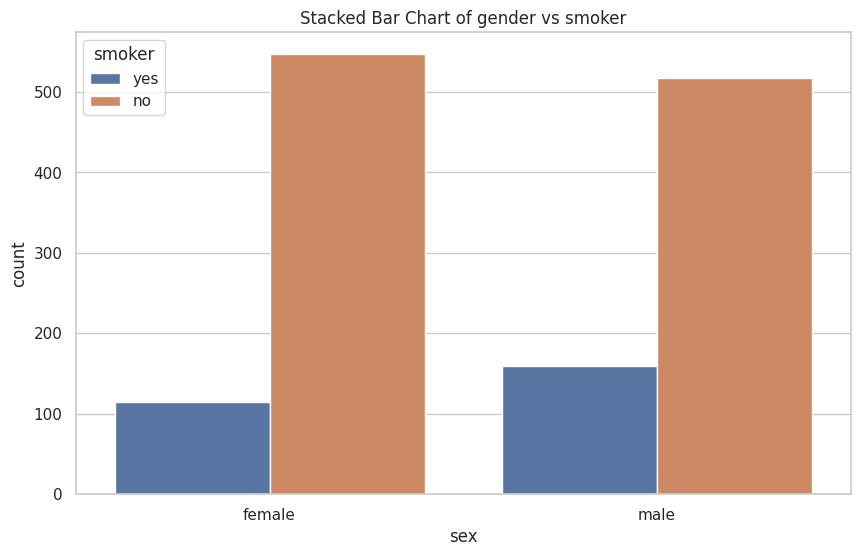

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x='sex', hue='smoker', data=medical_df)
plt.title('Stacked Bar Chart of gender vs smoker')
plt.show()

In [41]:
contingency_table = pd.crosstab(medical_df['sex'], medical_df['smoker'])
print(contingency_table)

smoker   no  yes
sex             
female  547  115
male    517  159


## Observation:

- Female has less number of smokers as compared to male smokers

## **Bivariate Analysis**

### 2.3 Column : BMI Vs Charges

## Q5. How is BMI affecting the distribution of charges

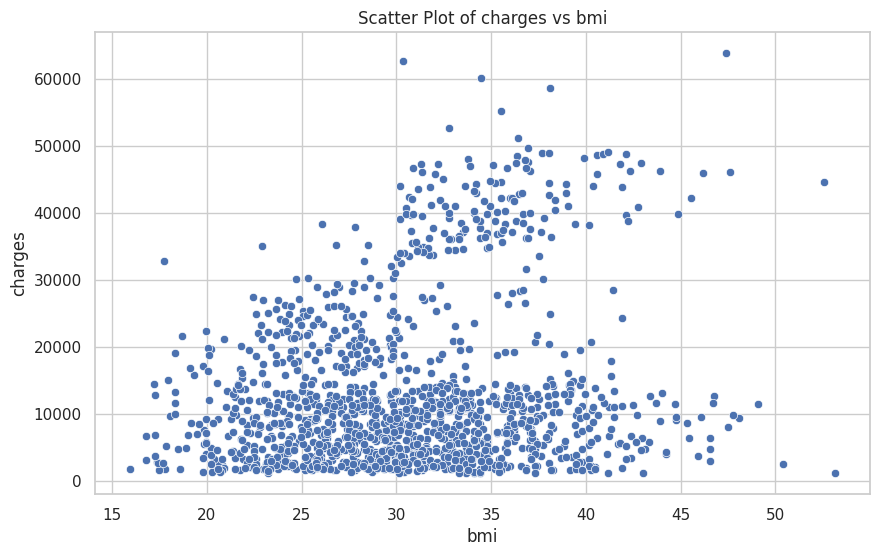

In [42]:
sns.scatterplot(x='bmi', y='charges', data=medical_df)
plt.title('Scatter Plot of charges vs bmi')
plt.show()

[Text(0.5, 1.0, 'bmi vs Charges')]

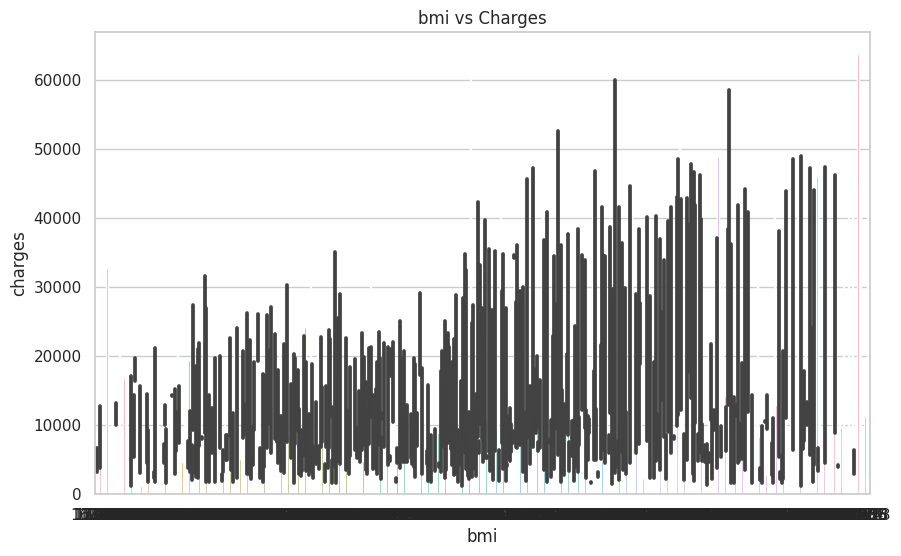

In [43]:
sns.barplot(x=medical_df.bmi,y= medical_df.charges).set(title="bmi vs Charges")

In [44]:
import statsmodels.api as sm

X = sm.add_constant(medical_df['bmi'])
y = medical_df['charges']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           2.46e-13
Time:                        15:19:24   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1192.9372   1664.802      0.717      0.4

### Observation:
- it looks like the "bmi" variable is statistically significant in predicting "charges," but the R-squared value suggests that the model explains only a small portion of the variance in the dependent variable.

- there is slight correlation between bmi and charges, as the bmi increases the charges increases

- There is a positive relationship between BMI and medical expenses, meaning people with higher BMI scores have higher medical bills. The relationship is not, however, very strong. There are possibly two groups to the scatter plot, judging by the spread of points above and below the regression line.

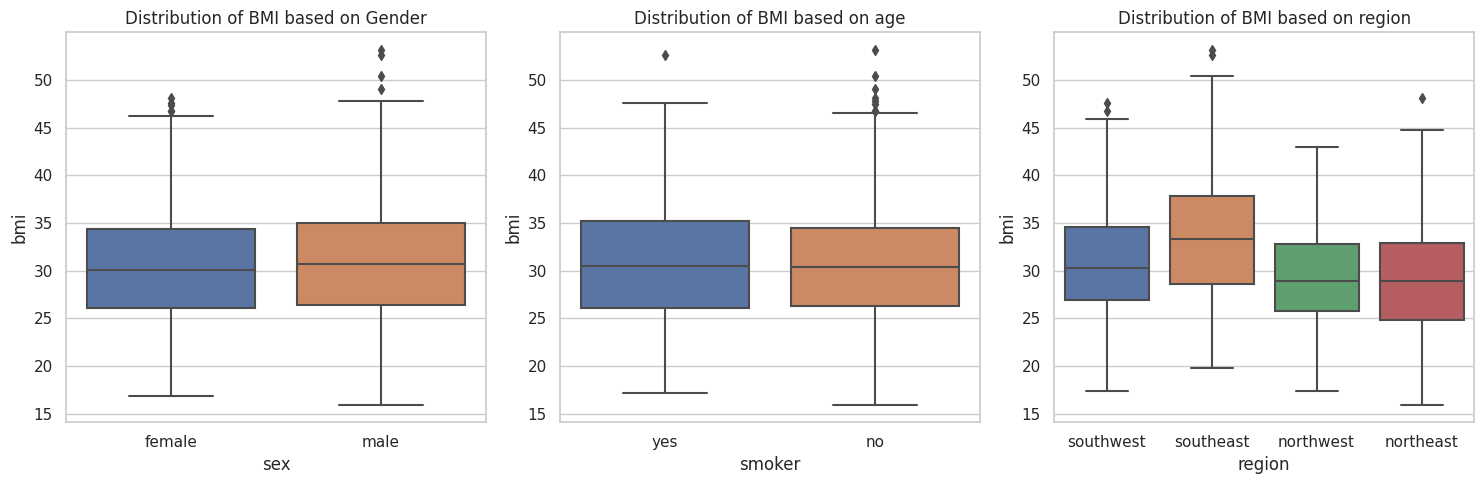

In [45]:
import seaborn as sns
# Set the style for seaborn
sns.set(style="whitegrid")

# Plot the distribution of various properties based on gender
plt.figure(figsize=(15, 5))

# Distribution of bmi based on gender
plt.subplot(1, 3, 1)
sns.boxplot(x='sex', y='bmi', data=medical_df)
plt.title('Distribution of BMI based on Gender')

# Distribution of BMI based on gender
plt.subplot(1, 3, 2)
sns.boxplot(x='smoker', y='bmi', data=medical_df)
plt.title('Distribution of BMI based on age')

# Distribution of BMI based on region
plt.subplot(1, 3, 3)
sns.boxplot(x='region', y='bmi', data=medical_df)
plt.title('Distribution of BMI based on region')


plt.tight_layout()
plt.show()

### Observation:

BMI Vs Sex
- The median BMI value of males are slightly higher than females

BMI Vs Smoker
- The median BMI value of both smoker and non smoker is almost same

BMI Vs Region
- Each region has different median
- BMI of south east region is higher


## Bivariate Analysis

### 2.4 Column : Children Vs Charges

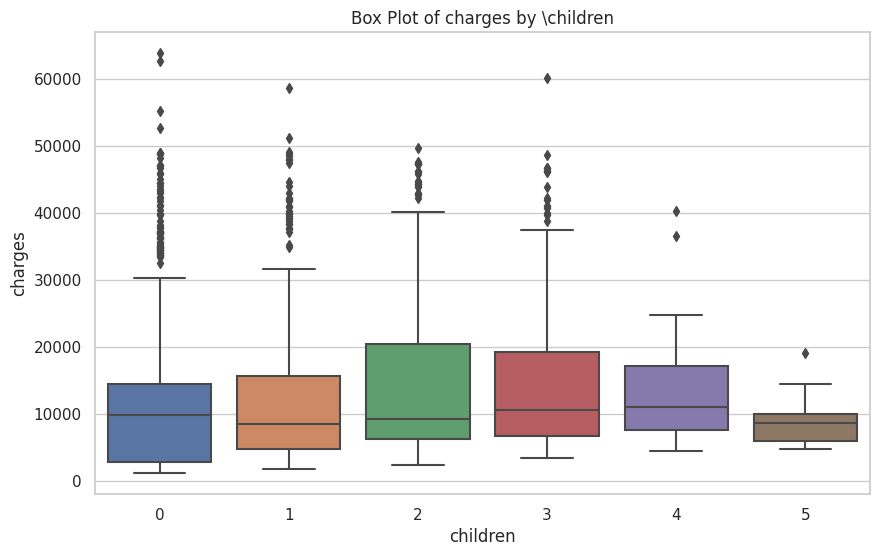

In [46]:
sns.boxplot(x='children', y='charges', data=medical_df)
plt.title('Box Plot of charges by \children')
plt.show()

[Text(0.5, 1.0, 'Children vs Charges')]

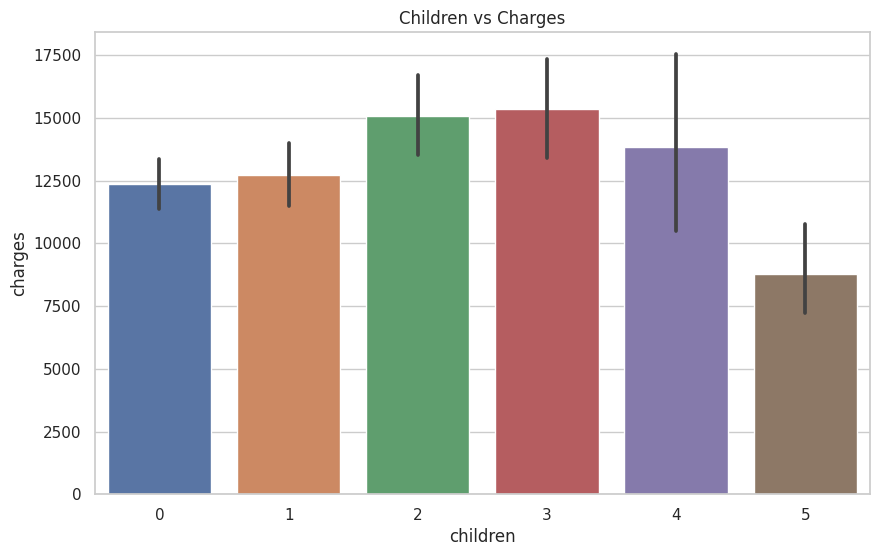

In [47]:
sns.barplot(x=medical_df.children,y=medical_df.charges).set(title="Children vs Charges")

### Observation:

- Beneficiary gets less premium for more number of children


## Q2. Perform hypothesis testing to check whether having more children results in fact that people smoke less


In [48]:
medical_df.sample(10)

,age,sex,bmi,children,smoker,region,charges
45,55,male,37.300,0,no,southwest,20630.28351
208,63,female,31.800,0,no,southwest,13880.94900
487,19,male,28.700,0,no,southwest,1253.93600
533,37,male,36.190,0,no,southeast,19214.70553
1048,25,female,22.515,1,no,northwest,3594.17085
962,63,female,35.200,1,no,southeast,14474.67500
277,22,female,24.300,0,no,southwest,2150.46900
350,57,female,23.180,0,no,northwest,11830.60720
729,41,female,36.080,1,no,southeast,6781.35420
146,46,male,30.495,3,yes,northwest,40720.55105


### Hypothesis Testing

Let's set the condition for null and alternate hypothesis testing:

- Null Hypothesis : There is a relation between smoking status and number of children
- Alternate Hypothesis : There is no relation between number of children and smoking status

In [49]:

import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(medical_df['children'], medical_df['smoker'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-square value: {chi2}')
print(f'P-value: {p_value}')

# Check the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that smoking status is dependent on the number of children.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that smoking status depends on the number of children.")

Chi-square value: 6.887719904947631
P-value: 0.22912555089568779
Fail to reject the null hypothesis. There is no significant evidence that smoking status depends on the number of children.


## Observation:

There is no significant evidence to support the claim that smoking status of policyholders has any relation with the number of childrens

## Bivariate Analysis

### 2.5 Column : Charges Vs Smokers

## Q4. What can you say about the differences in distribution of charges for smokers and non smokers



Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [50]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['red', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

- For most customers, the annual medical charges are under $10,000.
- Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases.
* There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is \\$7300, the median for smokers is close to \\$35,000.

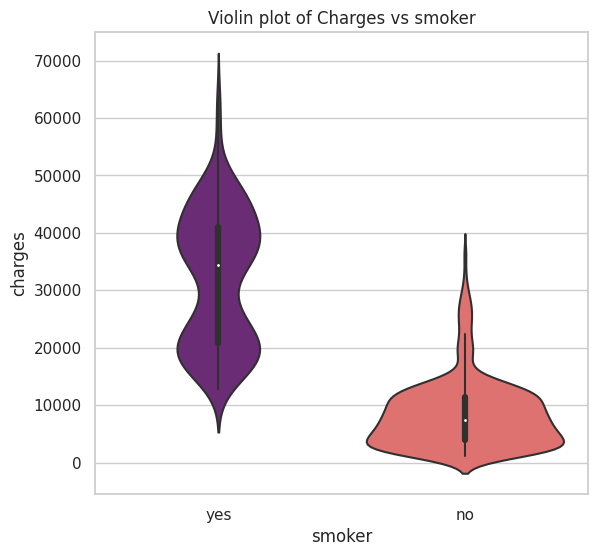

In [51]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=medical_df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

 ### Observation

- Insurance charge for smokers is much wide range compare to non smokers, the average charges for non smoker is approximately 5000 bucks. For smoker the minimum insurance charge is itself 5000 bucks.

## Bivariate Analysis

### Column : Charges Vs Others

#### Visualization of the distribution of medical charges in connection with other factors like "sex" and "region".

In [52]:
# Charges Vs Sex
fig = px.histogram(medical_df,
                   x = 'charges',
                   color = 'sex',
                   color_discrete_sequence = ["blue","red"],
                   title = 'Different charges over genders'

)
fig.update_layout(bargap=0.1)
fig.show()

In [53]:
# Charges Vs Region
fig = px.histogram(medical_df,
                  x = "charges",
                  marginal = 'box',
                   color="region",
                  title = "charges over different regions of U.S.A")
fig.update_layout(bargap=0.1)
fig.show()

### Observation:

- Here in the distribution of charges over gender we see that males are substancially charged more because by subconsious behaviour males are exploratory and they are more likely to take risks and that keeps them in danger more than their counterpart.It is also evident that males of U.S are more inclined to get health insuarrance then female.

- And, in second distribution we see that southeaster part of U.S is leading in charges but majority of all customers from all parts of US are charged between 0-20k only.

Text(0.5, 1.0, 'Violin plot of Charges vs sex')

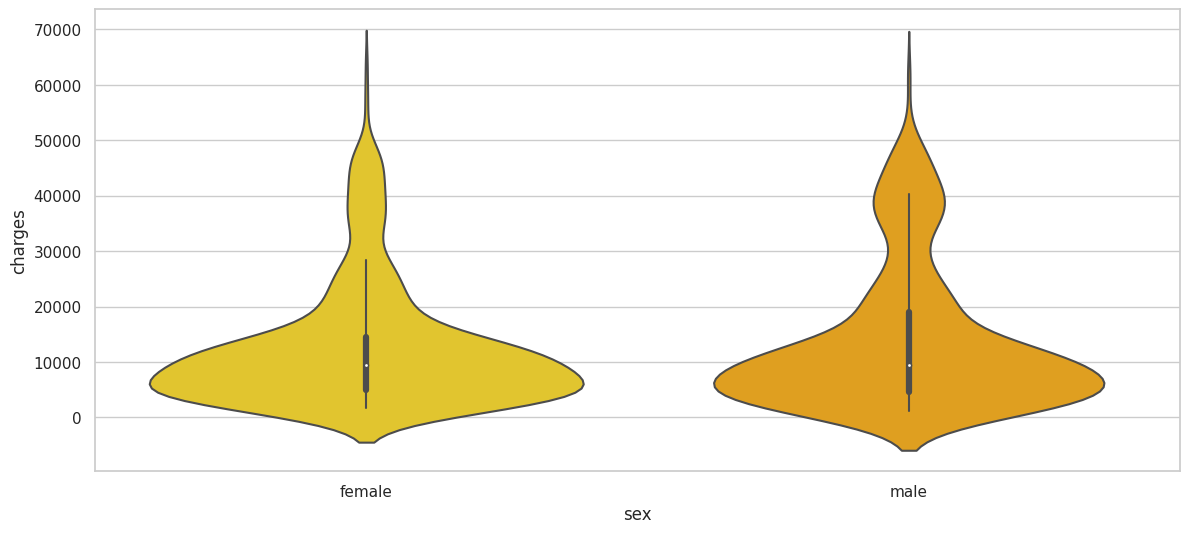

In [54]:
# Violin Chart for Charges Vs Sex
f = plt.figure(figsize=(14,6))
sns.violinplot(x='sex', y='charges',data=medical_df,palette='Wistia')
ax.set_title('Violin plot of Charges vs sex')

### Observation:

- Insurance charge for male and female is approximatley in same range,it is average around $5000

<Axes: xlabel='sex', ylabel='charges'>

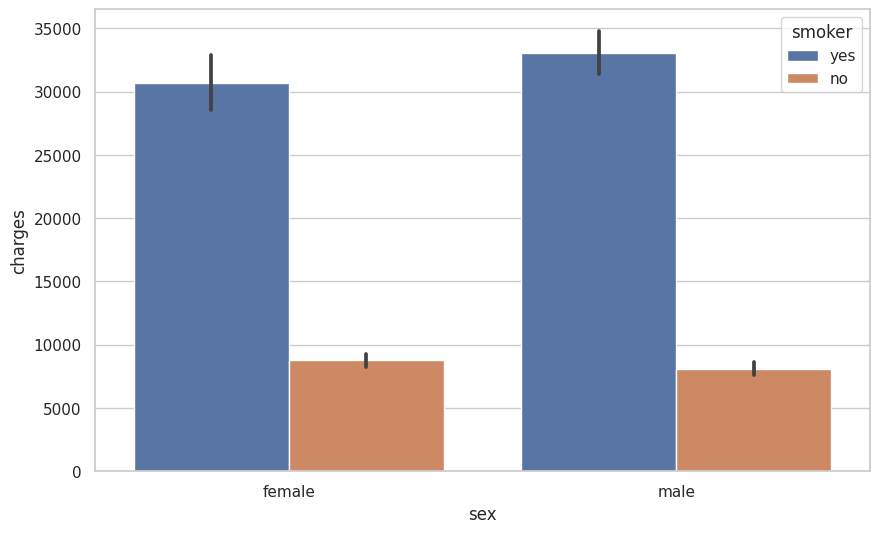

In [55]:
#bar chart for Charges Vs Sex
sns.barplot(data = medical_df,x = 'sex',y = 'charges',hue = "smoker")

### Observation:

- Females has less number of non smokers
- Females are charged slighly less as compared to male smokers

## Q6. Plot the region wise distribution of charges based on other variables and draw the insight

Text(0.5, 1.0, 'Violin plot of Charges vs sex')

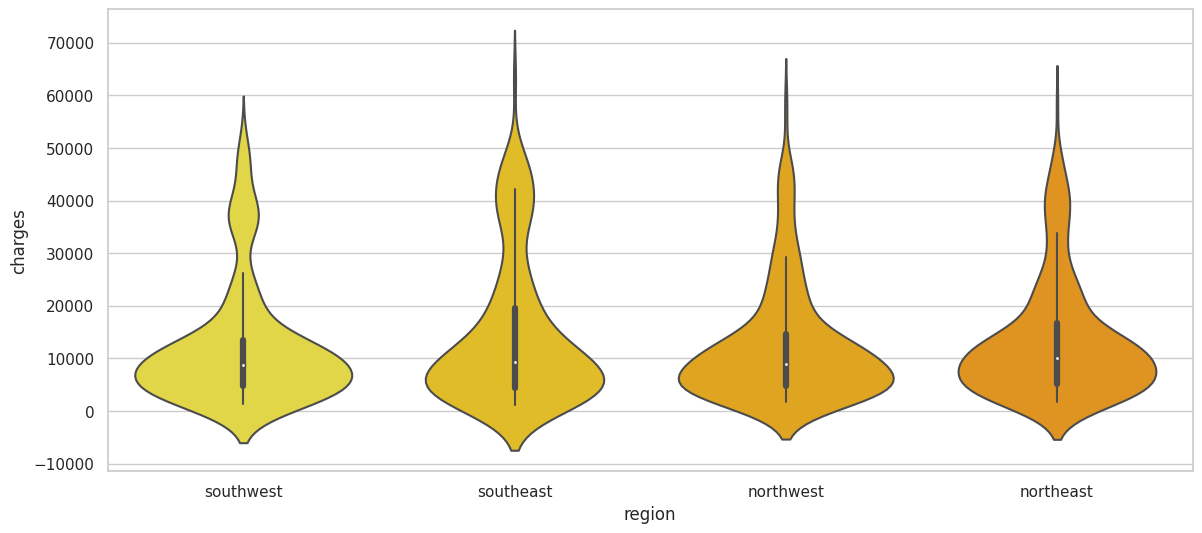

In [56]:
f = plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',data=medical_df,palette='Wistia')
ax.set_title('Violin plot of Charges vs sex')

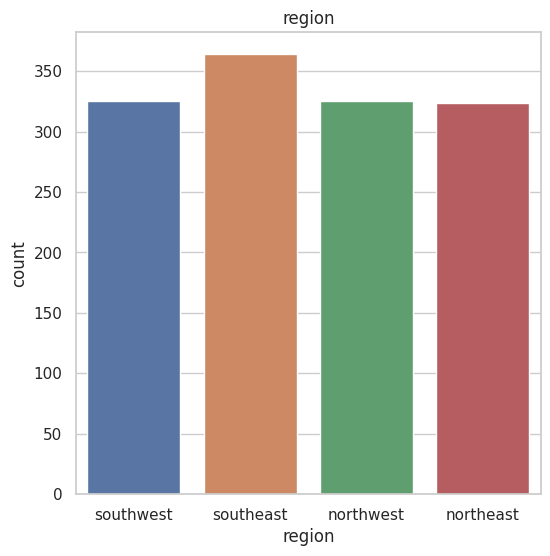

In [57]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=medical_df)
plt.title('region')
plt.show()

In [58]:
px.histogram(medical_df,x='sex',y = 'charges',color = 'region')

### Observation:

We can infer that from every region our customer base which has males are incurring more bills but interestingly females of northwest region are having more medical bills why is this happening that needs more in dept research

There doesn't seem to have a strong trend among this variables but we can see that customer having 5 children have charges incurred in a very specific range of 0 to 20,000$ and majority of customers having any number of children or no children altogether have charges in range of 0-20,000 dollars


We can infer that from every region our customer base which has males are incurring more bills but interestingly females of northwest region are having more medical bills why is this happening that needs more in dept research


## Q3. What variable do you think effect the charges the most and why(prove it)

### Correlation




In [59]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [60]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [61]:
medical_df.children.corr(medical_df.charges)

0.0679982268479048

In [62]:
medical_df.corr()

<ipython-input-62-cf93875bab50>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<ipython-input-63-fb1a45ef53cc>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



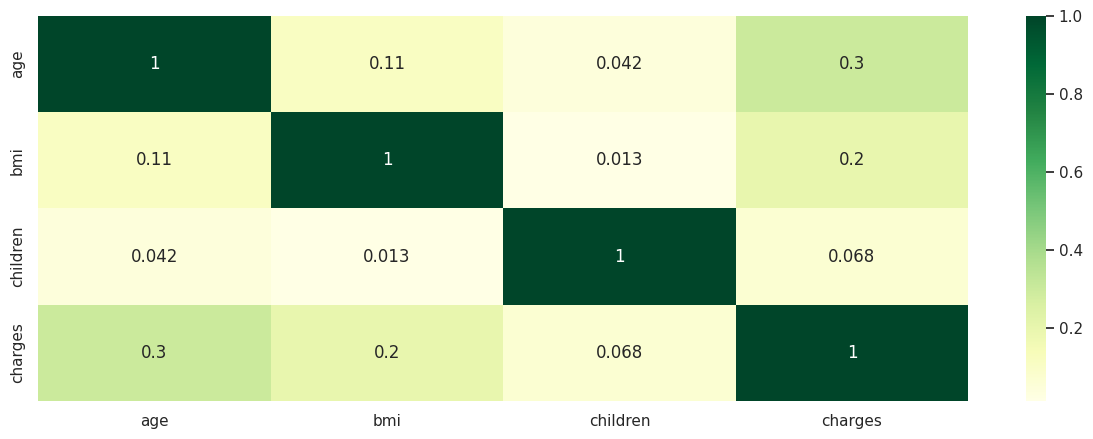

In [63]:
plt.figure(figsize=(15,5))
sns.heatmap(medical_df.corr(),annot=True ,cmap="YlGn" )
plt.show()


### Observation:
 - "age" and "bmi" seems to have positive correlation with "Charges"
 - During Bivariate Analysis we have noticed the trend in the scatter plot that medical charges increases with increase in Age

In [64]:
medical_data = medical_df.copy()

In [65]:
medical_data.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

[Text(0.5, 1.0, 'Children vs Charges')]

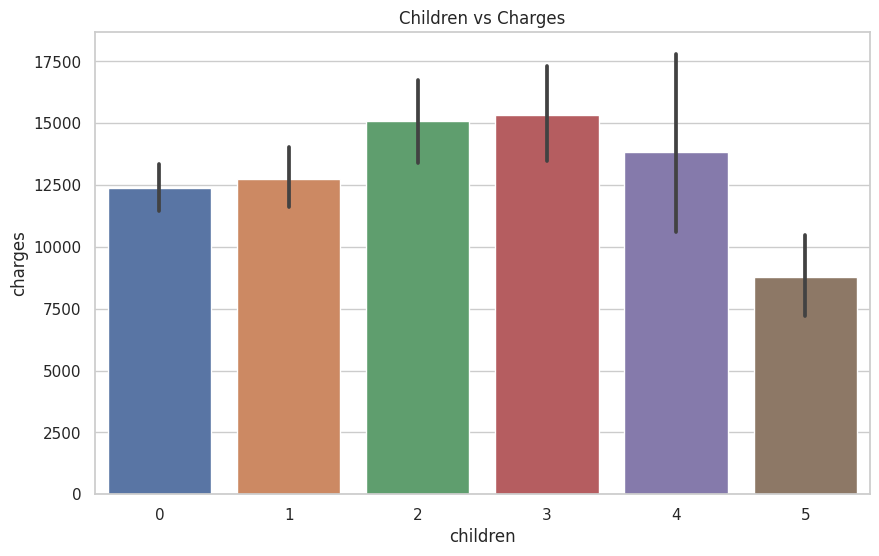

In [66]:
sns.barplot(x=medical_data.children,y=medical_data.charges).set(title="Children vs Charges")

## Observation

- Most of the policyholders are childless
- The policyholders having more than 3 children has less premium offered
- Most policyholders have been charged high having 2 & 3

[Text(0.5, 1.0, 'Sex Vs Charges')]

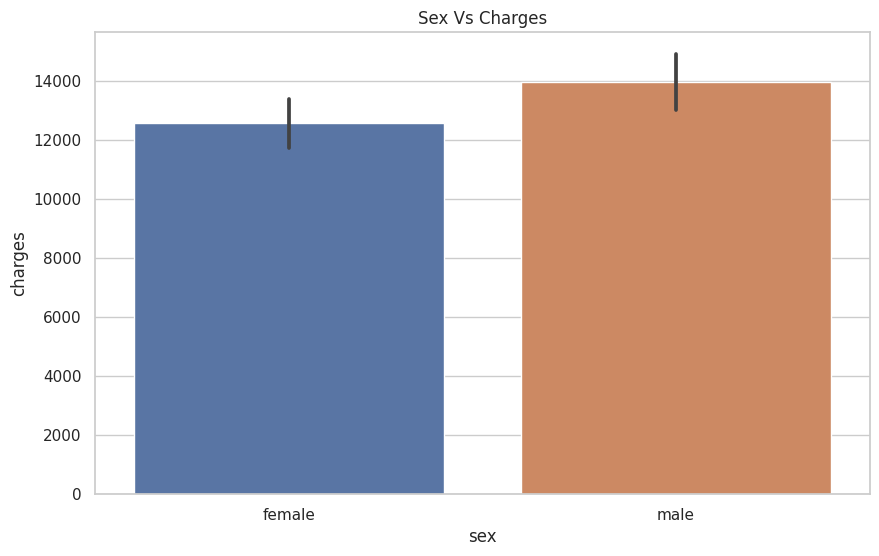

In [67]:
sns.barplot(x=medical_data.sex,y=medical_data.charges).set(title='Sex Vs Charges')

## Observation

- Males have been charged slightly higher than females


[Text(0.5, 1.0, 'Region Vs Charges')]

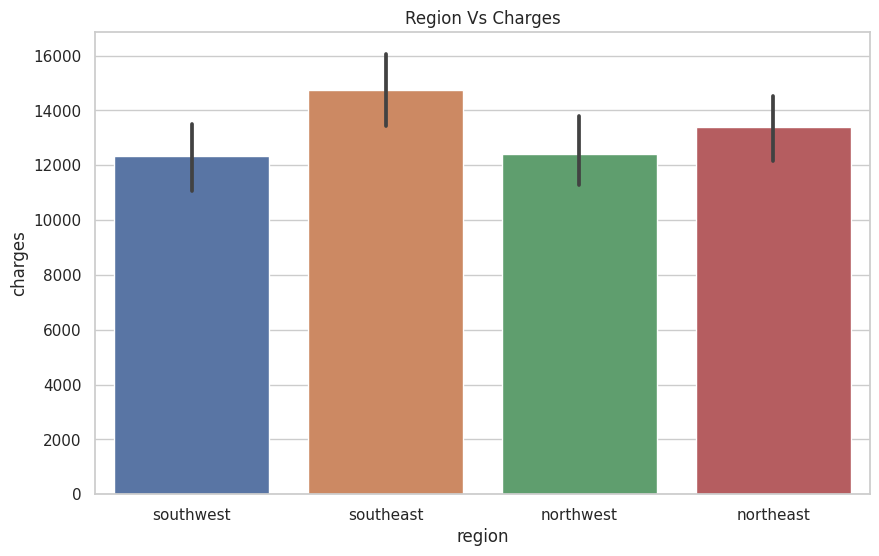

In [68]:
sns.barplot(x='region',y='charges',data=medical_data).set(title='Region Vs Charges')

## 3.Multivariate Analysis

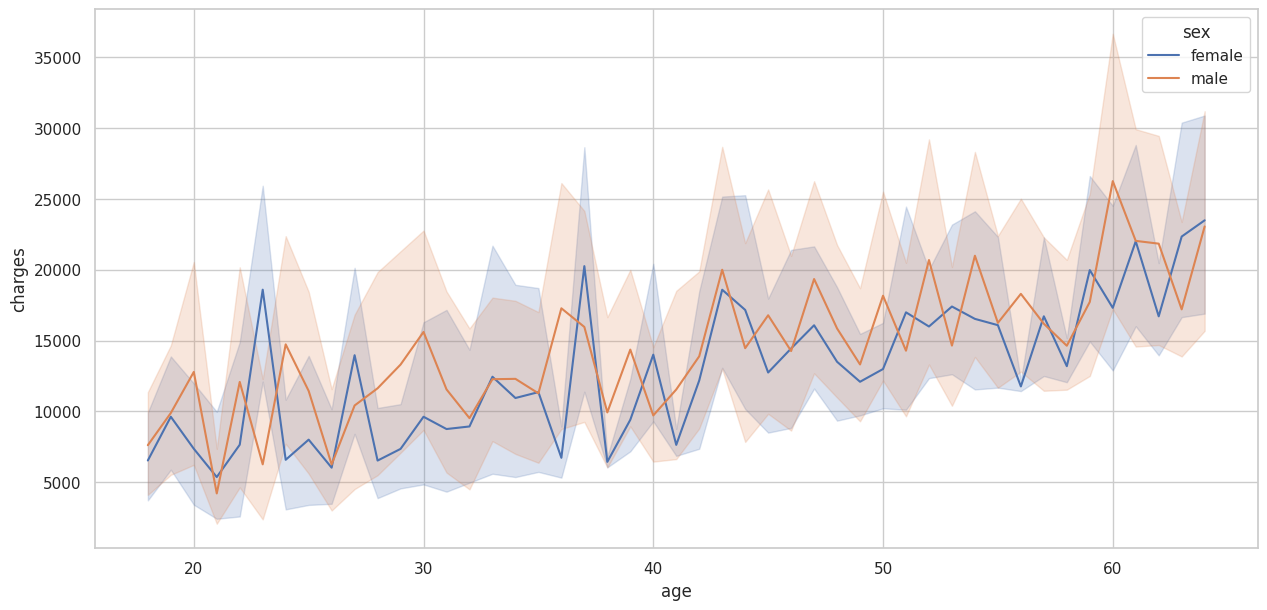

In [69]:
plt.figure(figsize=(15,7))
sns.lineplot(x='age', y='charges', hue='sex', data=medical_data)

# Show the plot
plt.show()

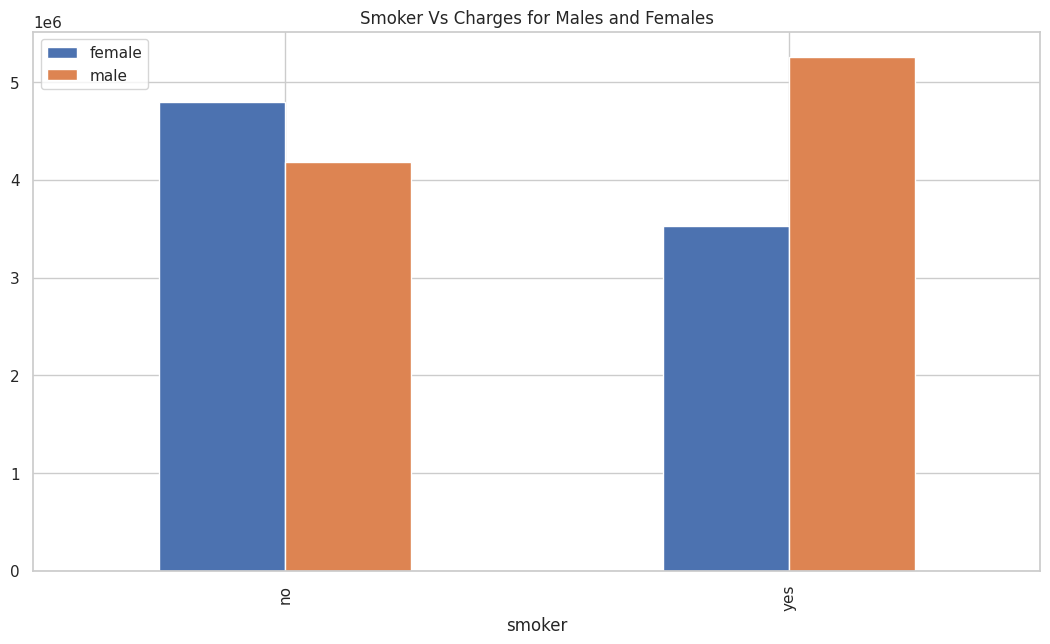

In [70]:
df_smoker_char_sex=pd.crosstab(index=medical_data.smoker,columns=medical_data.sex , values=medical_data.charges,aggfunc='sum')
fig1, axes1=plt.subplots(1,1,figsize=(13, 7))
df_smoker_char_sex.plot(kind='bar',ax=axes1,title="Smoker Vs Charges for Males and Females")
plt.legend(loc='upper left')
plt.show()


### Observations

- Charges incurred for males are more than charges incured for females
With increasing age of policy holder charges incured are going high for both male and female.
- There some spikes for female at an approximate ages of 23,28,43.
- Most claims are from southeast regions.
- Males who smoke have most claims and have higher bills
- Number of claims made by female who dont smoke is more compared to female who smoke.

In [71]:
#creating groups of bmi
category=pd.cut(medical_data.bmi,bins=[15,25,35,45,55],labels=['15-25','25-35','35-45','45-55'])
medical_data.insert(5,'BMIGroup',category)

In [72]:
medical_data.head()

,age,sex,bmi,children,smoker,BMIGroup,region,charges
0,19,female,27.900,0,yes,25-35,southwest,16884.92400
1,18,male,33.770,1,no,25-35,southeast,1725.55230
2,28,male,33.000,3,no,25-35,southeast,4449.46200
3,33,male,22.705,0,no,15-25,northwest,21984.47061
4,32,male,28.880,0,no,25-35,northwest,3866.85520


In [73]:
#no of children has no relation with charges
medical_data.groupby(medical_data.children).charges.mean()

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

In [74]:
medical_data.groupby(medical_data.BMIGroup).charges.mean()

BMIGroup
15-25    10284.290025
25-35    12720.254311
35-45    16913.681515
45-55    17547.926750
Name: charges, dtype: float64

In [75]:
category1=pd.cut(medical_data.age,bins=[18,28,38,48,58,68],labels=['18-28','28-38','38-48','48-58','58-68'])
medical_data.insert(6,'AgeBin',category1)

In [76]:
medical_data.groupby(medical_data.AgeBin).charges.mean()

AgeBin
18-28     9528.142786
28-38    11598.554943
38-48    14334.585843
48-58    15887.954341
58-68    20824.972901
Name: charges, dtype: float64

In [77]:
medical_data.groupby(['region','sex','smoker']).mean()['charges'].unstack()

<ipython-input-77-9c4ade553f51>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



smoker                     no           yes
region    sex                              
northeast female  9640.426984  28032.046398
          male    8664.042222  30926.252583
northwest female  8786.998679  29670.824946
          male    8320.689321  30713.181419
southeast female  8440.205552  33034.820716
          male    7609.003587  36029.839367
southwest female  8234.091260  31687.988430
          male    7778.905534  32598.862854

[Text(0.5, 1.0, 'Age Vs Charges')]

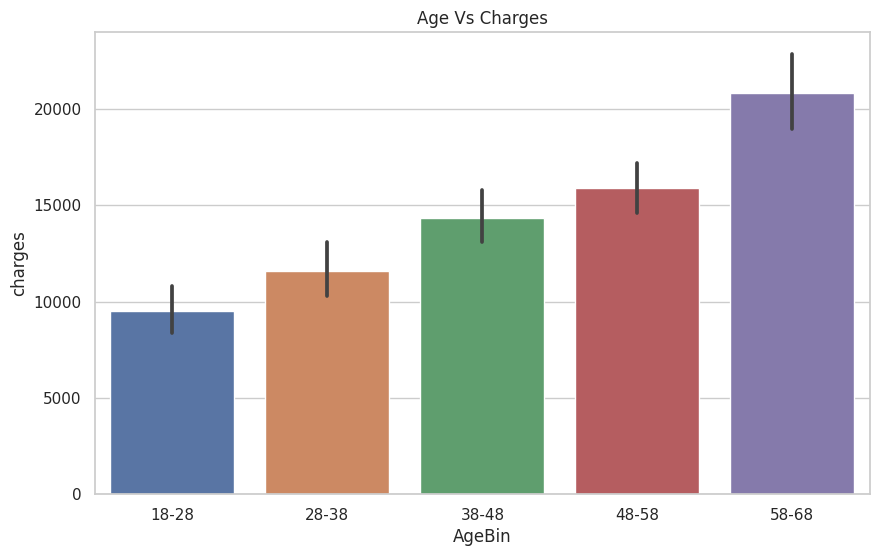

In [78]:
sns.barplot(x=medical_data.AgeBin,y=medical_data.charges).set(title='Age Vs Charges')

<Axes: xlabel='BMIGroup', ylabel='charges'>

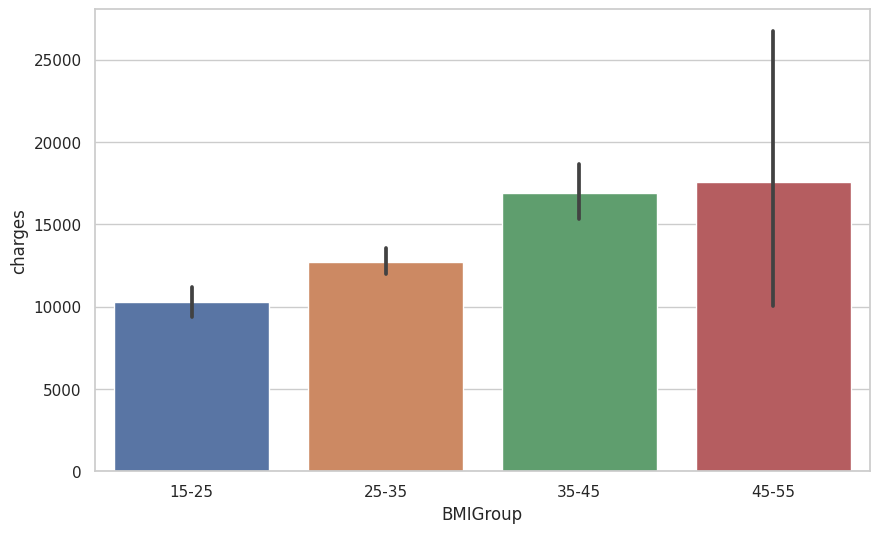

In [79]:
sns.barplot(x=medical_data.BMIGroup,y=medical_data.charges)

[Text(0.5, 1.0, 'Fig 2:BMI group and Charges ')]

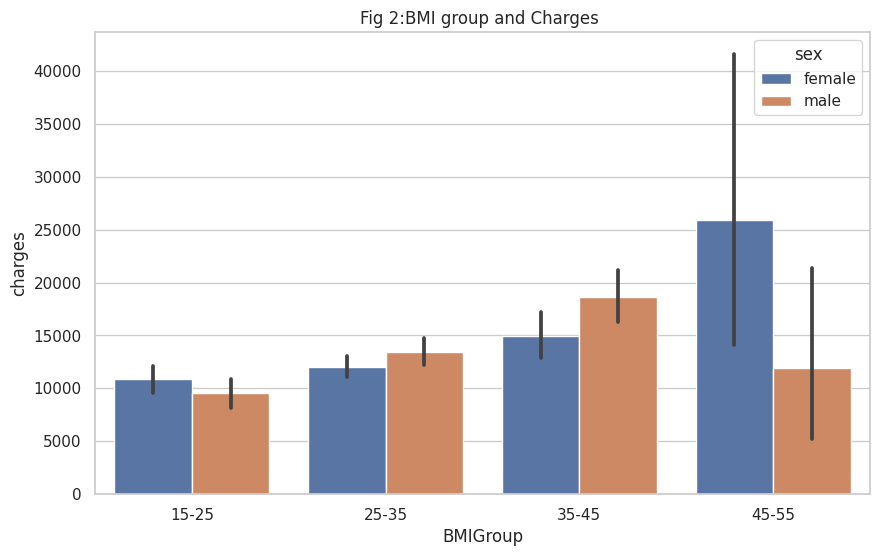

In [80]:
sns.barplot(x='BMIGroup',y='charges',hue='sex',data=medical_data).set(title="Fig 2:BMI group and Charges " )

### Observations

- FeMales with most BMI has incured most charges to the insurance company
- BMI for male and females are not same
- Beneficary with higher BMI have incurred more cost to insurance.

In [81]:
pd.crosstab(medical_data['sex'],medical_data['children'])

children,0,1,2,3,4,5
sex,,,,,,
female,289,158,119,77,11,8
male,285,166,121,80,14,10


<Figure size 2500x1000 with 0 Axes>

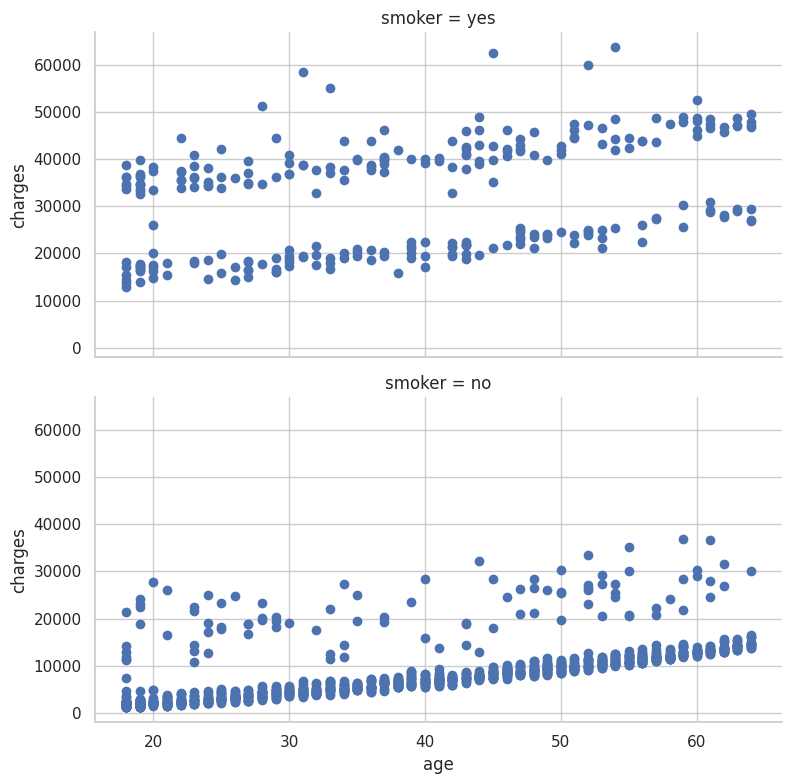

In [82]:
plt.figure(figsize=(25,10))
g=sns.FacetGrid(medical_data,row='smoker',height=4, aspect=2)
g=(g.map(plt.scatter ,'age','charges').add_legend())

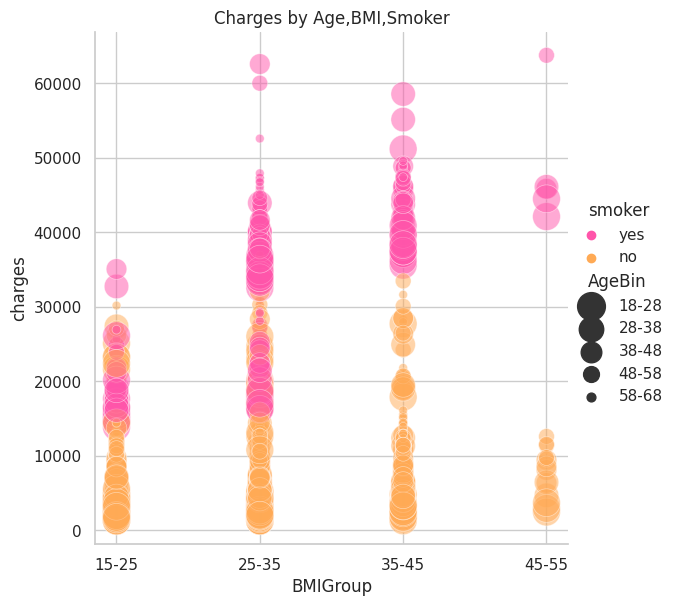

In [83]:
sns.relplot(x=medical_data.BMIGroup, y=medical_data.charges, hue=medical_data.smoker, size= medical_data.AgeBin,
            sizes=(40, 400), alpha=.5, palette="spring",
            height=6, data=medical_data).set(title='Charges by Age,BMI,Smoker');

## Observation

- Males who smoker have incured more cost compared to nonsmokers.
- As age increased claims increased -Smoker have higher medical claims

### Conclusion based on EDA

- The age of the beneficiary increases ,the cost to insurance increases.
- Males who smoke have most claims and have higher bills.
- Female who are nonsmoker also have more claims to nonsmoker males this may be because of child birth , need to explore claims type to understand better.
- Beneficiary with 2 or 3 dependent have billed higher compared to others people who have 5.This is unusual and may be because of uneven number of observations in each group. For example, no dependents group has 574 observations whereas five dependents group only has 18.
- Customer with bmi >30 are on higher side of obesity, have more health issues and have higher claims.
- Females with BMI more than 45 have billed higher to insurance.
- Age, BMI and Smoking are important attributes which can cost insurance company more.

## 3. Data Preprocessing

### 3.1 Encoding categorical Features

In [84]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [85]:
# Encoding Categorical Variable
medical_df['sex'].replace({"male":1,"female":0},inplace=True)

In [86]:
medical_df.value_counts()

age  sex  bmi     children  smoker  region     charges    
19   1    30.590  0         no      northwest  1639.56310     2
47   1    29.830  3         no      northwest  9620.33070     1
48   0    25.850  3         yes     southeast  24180.93350    1
          22.800  0         no      southwest  8269.04400     1
47   1    47.520  1         no      southeast  8083.91980     1
                                                             ..
31   0    25.740  0         no      southeast  3756.62160     1
          23.600  2         no      southwest  4931.64700     1
          21.755  0         no      northwest  4134.08245     1
30   1    44.220  2         no      southeast  4266.16580     1
64   1    40.480  0         no      southeast  13831.11520    1
Length: 1337, dtype: int64

In [87]:
medical_df['smoker'].replace({"yes":1,"no":0},inplace=True)

In [88]:
medical_df.smoker.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [89]:
medical_df_encoded = pd.get_dummies(medical_df, columns=['region'], prefix='region', drop_first=True)

In [90]:
medical_df_encoded.head(5)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [91]:
medical_df_encoded.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
smoker              0
charges             0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [92]:
#Splitting the Features and Target
X = medical_df_encoded.drop(columns='charges', axis=1)
y = medical_df_encoded['charges']

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [94]:
# standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [95]:
# Print the standardized datasets
print("X_train_scaled:")
print(X_train)
print("\nX_test_scaled:")
print(X_test)

X_train_scaled:
[[-1.5330973  -0.97676557 -0.40713453 ... -0.56089816 -0.61852256
  -0.58228498]
 [-0.03364163 -0.97676557  0.32855417 ... -0.56089816 -0.61852256
   1.71737215]
 [ 0.89459283 -0.97676557  2.56690911 ... -0.56089816  1.61675589
  -0.58228498]
 ...
 [ 0.03776102  1.02378711 -0.91016269 ... -0.56089816  1.61675589
  -0.58228498]
 [-1.46169465  1.02378711  0.76659782 ...  1.78285485 -0.61852256
  -0.58228498]
 [-0.46205754 -0.97676557 -1.96596021 ... -0.56089816 -0.61852256
   1.71737215]]

X_test_scaled:
[[ 0.89459283  1.02378711 -0.08863026 ... -0.56089816 -0.61852256
   1.71737215]
 [ 0.53757957 -0.97676557 -0.22180837 ... -0.56089816  1.61675589
  -0.58228498]
 [ 0.60898222  1.02378711  1.57449152 ...  1.78285485 -0.61852256
  -0.58228498]
 ...
 [ 1.10880078  1.02378711  1.20785059 ... -0.56089816  1.61675589
  -0.58228498]
 [ 1.75142463  1.02378711  1.34905148 ... -0.56089816  1.61675589
  -0.58228498]
 [ 1.60861933 -0.97676557 -0.92299913 ... -0.56089816 -0.61852256


## Linear Regression

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the linear regression model
model = LinearRegression()

# Define hyperparameters for tuning
param_grid = {
    'fit_intercept': [True, False]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train,y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_linear = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_linear)

# Calculate adjusted R^2
n = len(y_test)
p = X.shape[1]  # number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print the metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)
print("Adjusted R^2:", adjusted_r2)
print("Best hyperparameters:", grid_search.best_params_)


MAE: 4011.4496793279895
MSE: 33342497.82695459
RMSE: 5774.296305780868
R^2: 0.7909160991789904
Adjusted R^2: 0.7866599383480284
Best hyperparameters: {'fit_intercept': True}


## Support Vector Machine

In [97]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define the Support Vector Regression model
model = SVR()

# Define hyperparameters for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf', 'poly']
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_svr = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svr)

# Calculate adjusted R^2
n = len(y_test)
p = X.shape[1]  # number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print the metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)
print("Adjusted R^2:", adjusted_r2)
print("Best hyperparameters:", grid_search.best_params_)


MAE: 4616.822494315405
MSE: 86307731.30834669
RMSE: 9290.195439728202
R^2: 0.45878208565489065
Adjusted R^2: 0.4477649270931582
Best hyperparameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}


## Decision Tree Regresson

In [98]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the Decision Tree Regression model
model = DecisionTreeRegressor()

# Define hyperparameters for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_dt = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dt)

# Calculate adjusted R^2
n = len(y_test)
p = X.shape[1]  # number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print the metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)
print("Adjusted R^2:", adjusted_r2)
print("Best hyperparameters:", grid_search.best_params_)


MAE: 2717.684040637949
MSE: 23049529.3456969
RMSE: 4800.992537558968
R^2: 0.8554611735239986
Adjusted R^2: 0.8525189073361921
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


## Random Forest

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the Random Forest Regression model
model = RandomForestRegressor()

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

# Calculate adjusted R^2
n = len(y_test)
p = X.shape[1]  # number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print the metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)
print("Adjusted R^2:", adjusted_r2)
print("Best hyperparameters:", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraT

MAE: 2511.304769931997
MSE: 18058306.139189404
RMSE: 4249.506575967309
R^2: 0.8867601008959392
Adjusted R^2: 0.884454963000691
Best hyperparameters: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


## Gradient Boost

In [100]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define the Gradient Boosting Regression model
model = GradientBoostingRegressor()

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_gb= best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_gb)
mse = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gb)

# Calculate adjusted R^2
n = len(y_test)
p = X.shape[1]  # number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print the metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)
print("Adjusted R^2:", adjusted_r2)
print("Best hyperparameters:", grid_search.best_params_)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packag

MAE: 2447.029154701893
MSE: 17009489.501273427
RMSE: 4124.256236131968
R^2: 0.8933370128909418
Adjusted R^2: 0.8911657561558973
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`m

## XGBOOST

In [101]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define the XGBoost Regression model
model = XGBRegressor()

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_xgb = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

# Calculate adjusted R^2
n = len(y_test)
p = X.shape[1]  # number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print the metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)
print("Adjusted R^2:", adjusted_r2)
print("Best hyperparameters:", grid_search.best_params_)


MAE: 2449.202334698811
MSE: 17127864.534898
RMSE: 4138.582430603262
R^2: 0.8925947075628138
Adjusted R^2: 0.8904083402867388
Best hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}


In [102]:
# Evaluate models
models = {
    'Linear Regression': y_pred_linear,
    'SVR': y_pred_svr,
    'Decision Tree Regression': y_pred_dt,
    'Random Forest Regression': y_pred_rf,
    'Gradient Boosting Regression': y_pred_gb,
    'XGBoost Regression': y_pred_xgb,
}

for model_name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate adjusted R-squared
    n = len(y_test)
    p = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print(f'Model: {model_name}')
    print(f'Mean Squared Error on Test Set: {mse}')
    print(f'Root Mean Squared Error on Test Set: {rmse}')
    print(f'Mean Absolute Error on Test Set: {mae}')
    print(f'R-squared on Test Set: {r2}')
    print(f'Adjusted R-squared on Test Set: {adj_r2}')
    print('-' * 50)


Model: Linear Regression
Mean Squared Error on Test Set: 33342497.82695459
Root Mean Squared Error on Test Set: 5774.296305780868
Mean Absolute Error on Test Set: 4011.4496793279895
R-squared on Test Set: 0.7909160991789904
Adjusted R-squared on Test Set: 0.7866599383480284
--------------------------------------------------
Model: SVR
Mean Squared Error on Test Set: 86307731.30834669
Root Mean Squared Error on Test Set: 9290.195439728202
Mean Absolute Error on Test Set: 4616.822494315405
R-squared on Test Set: 0.45878208565489065
Adjusted R-squared on Test Set: 0.4477649270931582
--------------------------------------------------
Model: Decision Tree Regression
Mean Squared Error on Test Set: 23049529.3456969
Root Mean Squared Error on Test Set: 4800.992537558968
Mean Absolute Error on Test Set: 2717.684040637949
R-squared on Test Set: 0.8554611735239986
Adjusted R-squared on Test Set: 0.8525189073361921
--------------------------------------------------
Model: Random Forest Regression

If we comapre the error metrics of all the regression model
XGBoost is the best model as it has lowest MAE, MSE, RMSE and highest adjusted R2 value